In [59]:
import random
from graphviz import Graph
#import pandas as pd
from IPython.display import display
random.seed()

In [60]:
class Edge:
    def __init__(self, source, target, color):
        self.source = source
        self.target = target
        self.color = color
        self.display = True

In [96]:
colors = ['blue', 'red', 'brown', 'purple', 'green', 'black']
# g = Graph('G')
def show_graph(edges):
    g=Graph('G')
    g.attr(label='CURRENT GRAPH')
    g.attr(layout='circo')
    g.node_attr.update(shape='circle')
    for edge in edges:
        g.node(str(edge.source))
        g.node(str(edge.target))
        if(edge.display == True):
            g.edge(str(edge.source),str(edge.target), color=edge.color, penwidth='2.0')
        else:
            g.edge(str(edge.source),str(edge.target), color='transparent', penwidth='2.0')
    return g

def show_solution(edges, solution):
    g=Graph('G')
    g.attr(layout='circo')
    g.attr(label='CURRENT SOLUTION')
    g.node_attr.update(shape='circle')
    for edge in edges:
        g.node(str(edge.source))
        g.node(str(edge.target))
        if(edge in solution):
            g.edge(str(edge.source),str(edge.target), color=edge.color, penwidth='2.0')
        else:
            g.edge(str(edge.source),str(edge.target), color='transparent', penwidth='2.0')
    return g

def generate_complete_graph(nr_vertices, nr_colors):
    edges = []
    label = 1
    for x in range(nr_vertices):
        for y in range(x+1,nr_vertices):
            rand_color = random.randint(0, nr_colors-1)
            color = colors[rand_color]
            edges.append(Edge(x,y,color))
            label+=1
    return edges
        
def generate_random_graph(nr_vertices, max_weight):
    graph = []
    graph = [[None for i in range(nr_vertices)] for i in range(nr_vertices)]
    for x in range(nr_vertices):
        for y in range(nr_vertices):
            edge_exists = random.randint(1,3)
            if(x == y or edge_exists != 1):
                weight = None
            else:
                weight = random.randint(1,max_weight)
            graph[x][y] = weight
            graph[y][x] = weight
    return graph

def get_next_color(edges):
    colors_count = [0] * len(colors)
    #print(colors_count)
    for edge in edges:
        if(edge.display):
            try:
                color_index = colors.index(edge.color)
                colors_count[color_index]+=1
            except:
                pass
    max_indexes = []
    max_color_count = max(colors_count)
    #print(colors_count)
#     print(colors)
    for i in range(len(colors_count)):
        if(colors_count[i]==max_color_count):
            max_indexes.append(i)
    return colors[random.choice(max_indexes)]

def get_random_edge_frequent_color(edges):
    next_color = get_next_color(edges)
    print(next_color)
    candidates = []
    for edge in edges:
        if(edge.display):
            if(edge.color == next_color):
                candidates.append(edge)
    #print("candidates:")
    #print_solution(candidates)
    #if(len(candidates) > 0):
    choosen_edge = random.choice(candidates)
    #    choosen_edge = None
    return choosen_edge

def get_random_edge_frequent_color_adjacent(edges, solution_vertexes):
    next_color = get_next_color(edges)
    print(next_color)
    candidates = []
    for edge in edges:
        if(edge.display):
            if(edge.color == next_color and \
            (edge.source in solution_vertexes or edge.target in solution_vertexes)):
                candidates.append(edge)
    #print("candidates:")
    #print_solution(candidates)
    #if(len(candidates) > 0):
    choosen_edge = random.choice(candidates)
    #    choosen_edge = None
    return choosen_edge

def get_next_edge(edges, solution_vertexes, solution_colors):
    for edge in edges:
        if(edge.display):
            if((edge.source in solution_vertexes or edge.target in solution_vertexes) \
               and edge.color in solution_colors):
                return edge
    return None

def remove_potential_cycles(edges,solution_vertexes):
    for edge in edges:
        if(edge.source in solution_vertexes and edge.target in solution_vertexes):
            edge.display=False
            #edges.remove(edge)

def print_solution(solution):
    print()
    for edge in solution:
        print("{},{} color:{}, ".format(edge.source,edge.target, edge.color),end=" ")
    print()
            
def solve(edges, nr_vertices):
    solution = []
    solution_vertexes = set()
    solution_colors = set()
    choosen_edge = get_random_edge_frequent_color(edges)
    solution.append(choosen_edge)
    #edges.remove(choosen_edge)
    choosen_edge.display = False
    solution_vertexes.add(choosen_edge.source)
    solution_vertexes.add(choosen_edge.target)
    solution_colors.add(choosen_edge.color)    
    
    #display(show_graph(edges))
    #print("current solution")
    #print_solution(solution)
    #display(show_solution(edges,solution))
    
    while(len(solution) < nr_vertices - 1):
        next_edge = get_next_edge(edges, solution_vertexes, solution_colors)
        if(next_edge == None):
            #print("next edge not found. looking for a random one with frequent color")
            next_edge = get_random_edge_frequent_color_adjacent(edges,solution_vertexes)
        #print("next edge: {},{} color:{}".format(next_edge.source,next_edge.target,next_edge.color))
        solution.append(next_edge)
        #edges.remove(next_edge)
        next_edge.display=False
        solution_vertexes.add(next_edge.source)
        solution_vertexes.add(next_edge.target)
        solution_colors.add(next_edge.color)
        remove_potential_cycles(edges, solution_vertexes)
        #display(show_solution(edges,solution))
        #display(show_graph(edges))
        #print("current solution: ")
        #print_solution(solution)
#         input()
    return solution
        

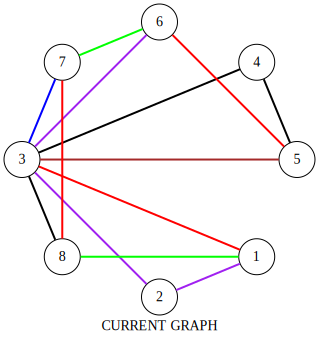

purple
candidates:

1,2 color:purple,  2,3 color:purple,  6,3 color:purple,  


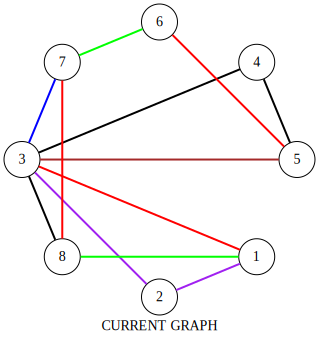

current solution

6,3 color:purple,  


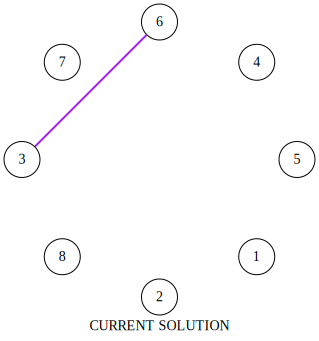

next edge: 2,3 color:purple


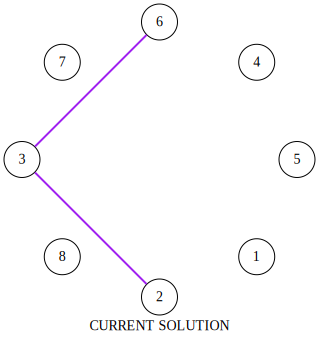

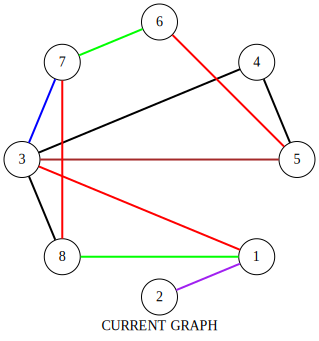

current solution: 

6,3 color:purple,  2,3 color:purple,  
next edge: 1,2 color:purple


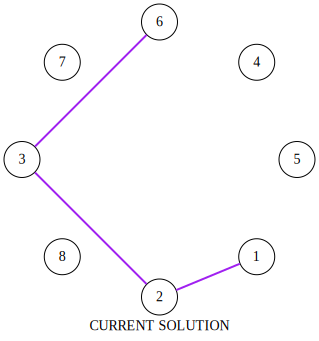

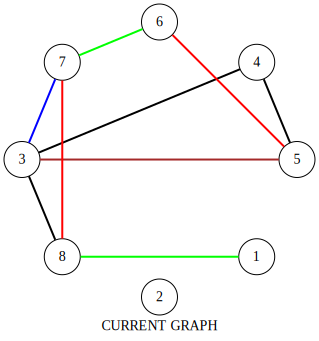

current solution: 

6,3 color:purple,  2,3 color:purple,  1,2 color:purple,  
next edge not found. looking for a random one with frequent color
black
candidates:

3,4 color:black,  8,3 color:black,  
next edge: 8,3 color:black


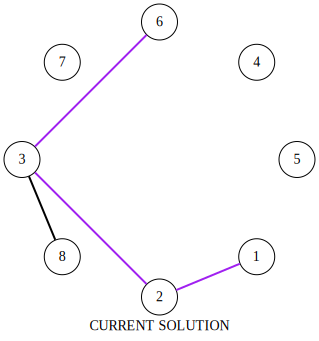

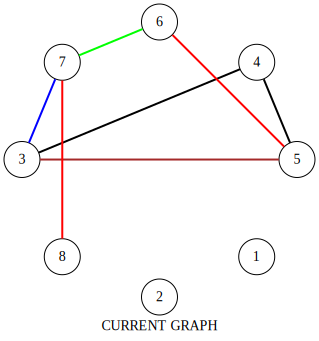

current solution: 

6,3 color:purple,  2,3 color:purple,  1,2 color:purple,  8,3 color:black,  
next edge: 3,4 color:black


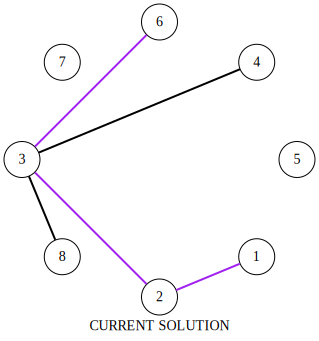

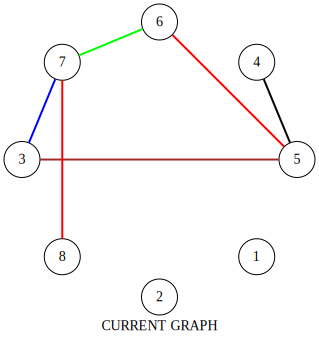

current solution: 

6,3 color:purple,  2,3 color:purple,  1,2 color:purple,  8,3 color:black,  3,4 color:black,  
next edge: 4,5 color:black


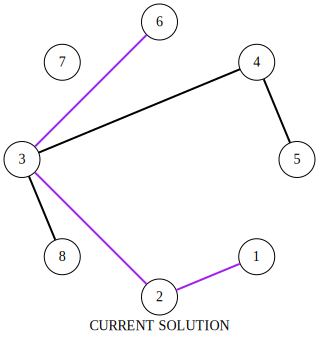

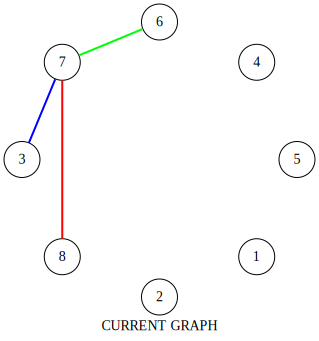

current solution: 

6,3 color:purple,  2,3 color:purple,  1,2 color:purple,  8,3 color:black,  3,4 color:black,  4,5 color:black,  
next edge not found. looking for a random one with frequent color
green
candidates:

6,7 color:green,  
next edge: 6,7 color:green


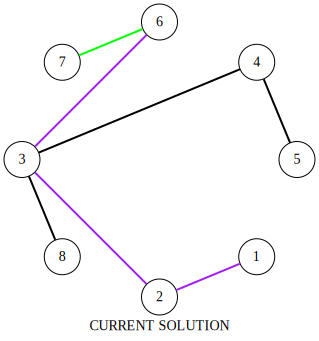

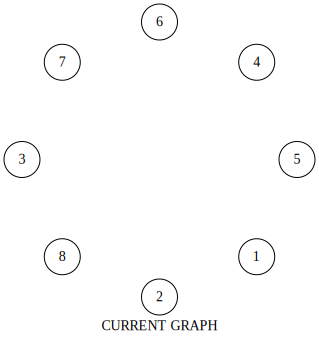

current solution: 

6,3 color:purple,  2,3 color:purple,  1,2 color:purple,  8,3 color:black,  3,4 color:black,  4,5 color:black,  6,7 color:green,  


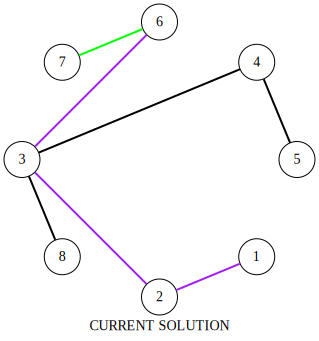

In [93]:
#example from the assignment statement
edges = []
edges.append(Edge(1,2,'purple'))
edges.append(Edge(1,3,'red'))
edges.append(Edge(2,3,'purple'))
edges.append(Edge(3,4,'black'))
edges.append(Edge(4,5,'black'))
edges.append(Edge(5,6,'red'))
edges.append(Edge(3,5,'brown'))
edges.append(Edge(6,7,'green'))
edges.append(Edge(6,3,'purple'))
edges.append(Edge(7,8,'red'))
edges.append(Edge(7,3,'blue'))
edges.append(Edge(8,1,'green'))
edges.append(Edge(8,3,'black'))
nr_vertices = 8
nr_colors = 6
display(show_graph(edges))
solution = solve(edges, nr_vertices)
display(show_solution(edges,solution))

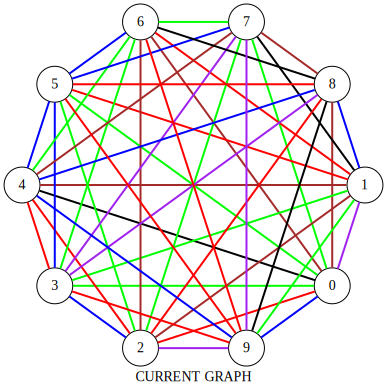

green
red


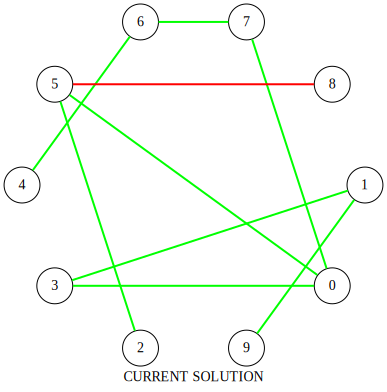

In [103]:
nr_vertices = 10
nr_colors = 6
edges = generate_complete_graph(nr_vertices, nr_colors)
display(show_graph(edges))
solution = solve(edges, nr_vertices)
display(show_solution(edges,solution))